In [2]:
#Fitting a line through data: with Machine Learning

In [8]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LinearRegression

# Load the California housing dataset
california = datasets.fetch_california_housing()

# Initialize the Linear Regression model
lr = LinearRegression()

# Bootstrap resampling
n_bootstraps = 1000
len_california = len(california.target)
subsample_size = int(0.5 * len_california)

# Function to generate subsample indices
subsample = lambda: np.random.choice(np.arange(0, len_california), size=subsample_size, replace=True)
coefs = np.ones(n_bootstraps)  # Pre-allocate the space for the coefficients

# Perform bootstrap resampling
for i in range(n_bootstraps):
    subsample_idx = subsample()
    subsample_X = california.data[subsample_idx]
    subsample_y = california.target[subsample_idx]
    lr.fit(subsample_X, subsample_y)
    coefs[i] = lr.coef_[0]  # Assuming we want to store the coefficient of the first feature

# Display results
print(f'Bootstrap estimated coefficients (first feature): {coefs[:10]}')  # Display the first 10 estimated coefficients


Bootstrap estimated coefficients (first feature): [0.44386806 0.44118036 0.41029005 0.42816375 0.44303777 0.43584068
 0.44516045 0.43639888 0.43963374 0.44212312]


Mean Absolute Error (MAE): 0.5445214393268037
Mean Squared Error (MSE): 0.5509524296956646


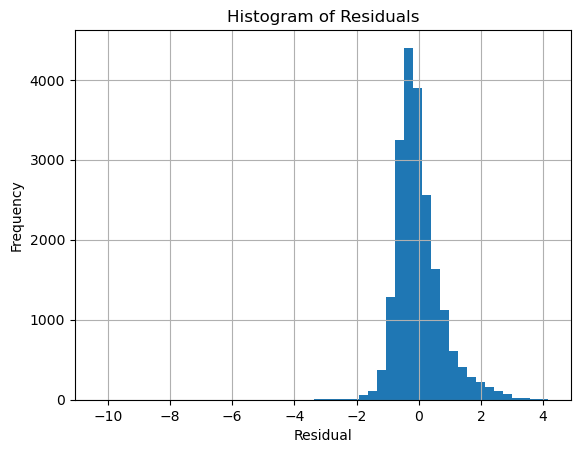

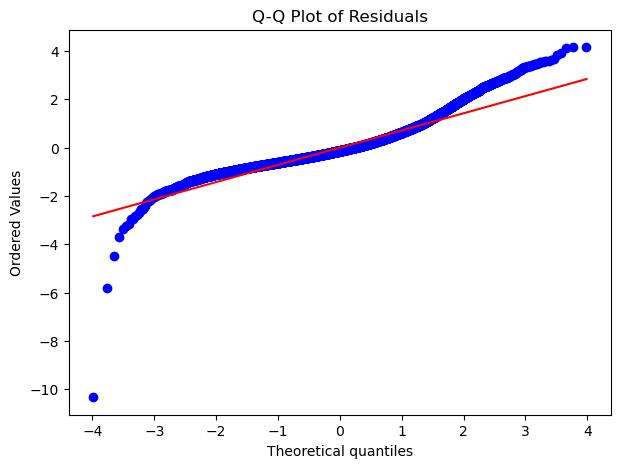

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.stats import probplot

# Ensure %matplotlib inline is used only in IPython environments
%matplotlib inline

# Load the California housing dataset
california = datasets.fetch_california_housing()

# Initialize the Linear Regression model
lr = LinearRegression()

# Perform cross-validation predictions
predictions_cv = cross_val_predict(lr, california.data, california.target, cv=10)

# Calculate and print MAE and MSE
mae = mean_absolute_error(california.target, predictions_cv)
mse = mean_squared_error(california.target, predictions_cv)
print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)

# Calculate residuals
residuals = california.target - predictions_cv

# Plotting the histogram of residuals
pd.Series(residuals).hist(bins=50)
plt.title('Histogram of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

# Plotting the Q-Q plot
f = plt.figure(figsize=(7, 5))
ax = f.add_subplot(111)
tuple_out = probplot(residuals, plot=ax)
plt.title('Q-Q Plot of Residuals')
plt.show()
